In [1]:
from chessrl import chess_py as cp, MCTS
from chessrl.env import LichessDefender, RandomDefender, SyzygyDefender, Env
from chessrl.utils.plot_chess import plot_game


2025-08-28 19:29:58,040 - INFO - Loading config file...


<Axes: >

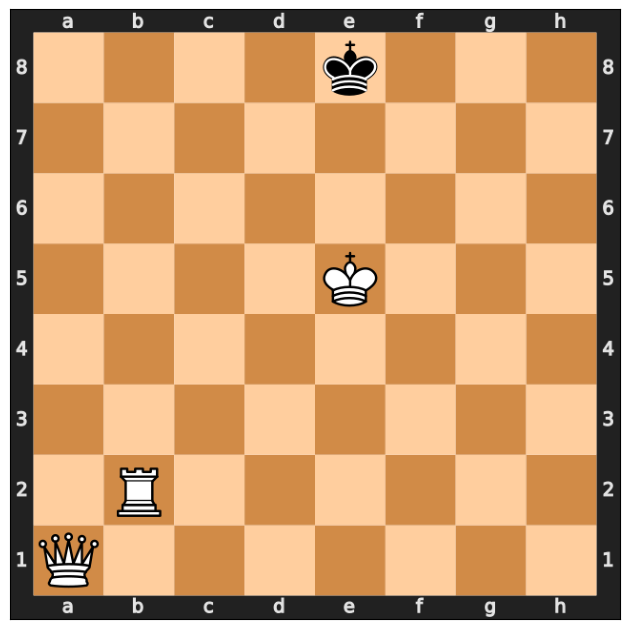

In [5]:

g = cp.Game()
g.reset_from_fen("4k3/8/8/4K3/8/8/1R6/Q7 w - - 0 1")  # example
plot_game(g)


In [4]:
# Or: rollouts via Env with a defender that auto-replies for Black
defender = RandomDefender(0)
mcts = MCTS(seconds=6.0, iterations=5_000, use_env_in_rollout=True,
            defender=defender, absorb_black_reply=True)
best = mcts.search(g)

if best is not None:
    print("Best move:", cp.Move.to_uci(best))


Best move: a1d1


Best move: b2b4


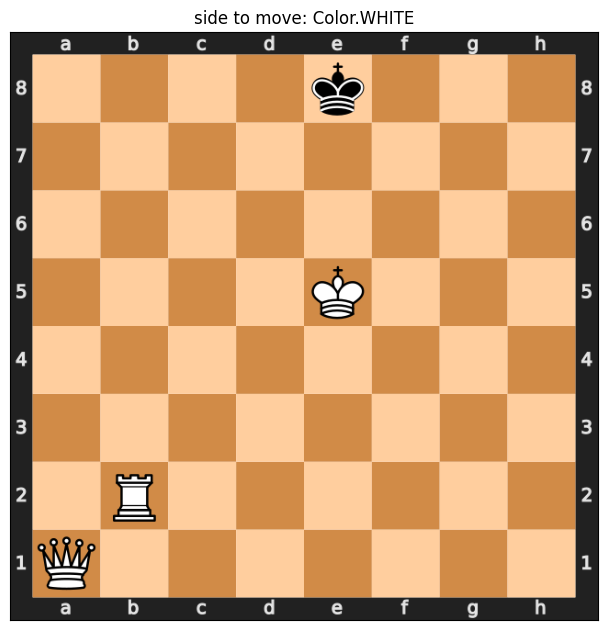

In [10]:
env = Env.from_fen(
    "4k3/8/8/4K3/8/8/1R6/Q7 w - - 0 1",
    defender=RandomDefender(0),
    absorb_black_reply=True
)

mcts = MCTS(seconds=6.0, iterations=5_000, use_env_in_rollout=True,
            defender=defender, absorb_black_reply=True)
best = mcts.search(env.state())

if best is not None:
    print("Best move:", cp.Move.to_uci(best))

env.display_state()


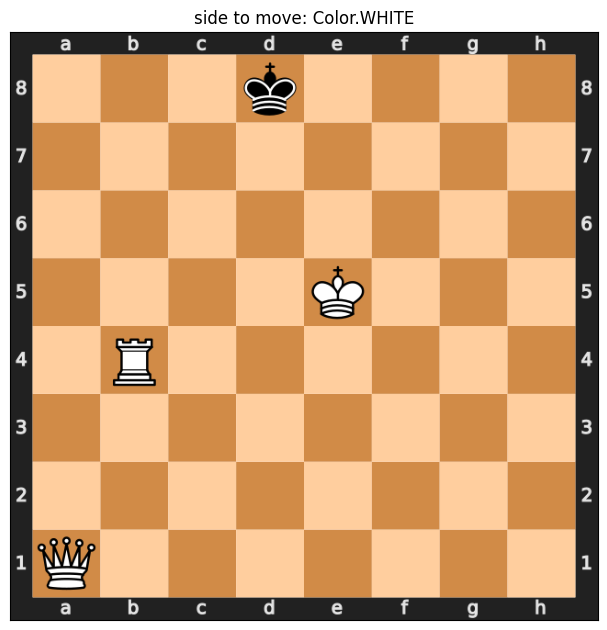

In [11]:

env.step(best)
env.display_state()


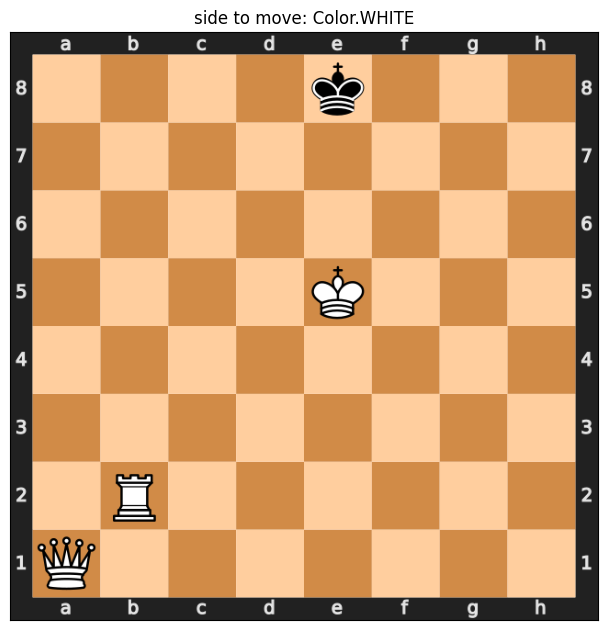

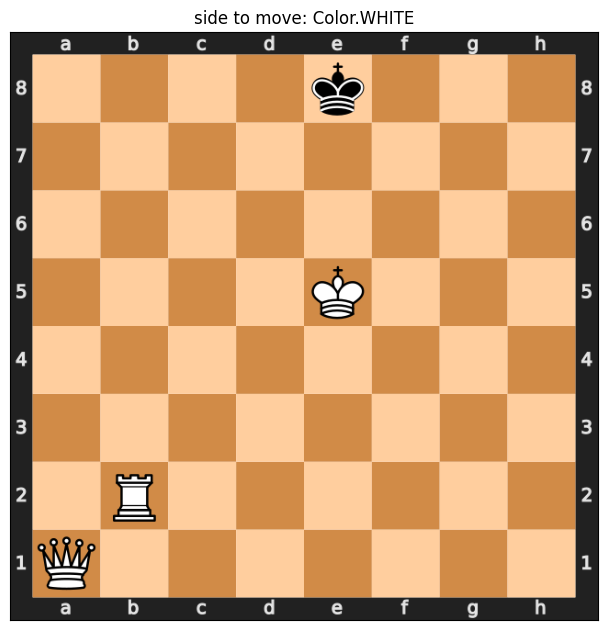

Best move: e5e6


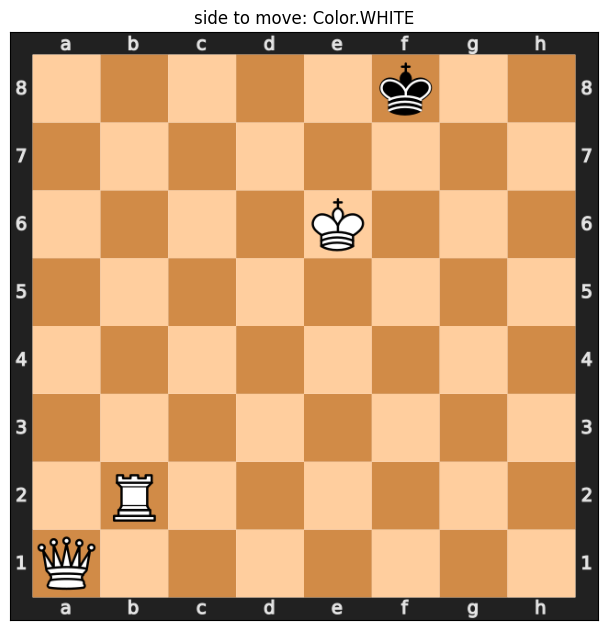

Best move: b2b8


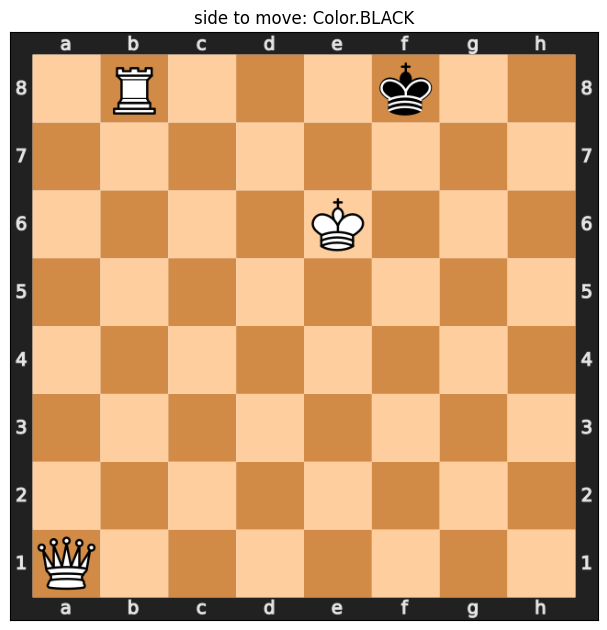

In [20]:
env = Env.from_fen(
    "4k3/8/8/4K3/8/8/1R6/Q7 w - - 0 1",
    defender=RandomDefender(0),
    absorb_black_reply=True
)

env.display_state()

while not env.is_terminal():
    mcts = MCTS(seconds=15.0, iterations=5_000, use_env_in_rollout=True,
                defender=defender, absorb_black_reply=True)
    best = mcts.search(env.state())

    if best is not None:
        print("Best move:", cp.Move.to_uci(best))
    env.step(best)
    env.display_state()
